In [1]:
%ls datasets/

oceania_covid.xlsx


In [2]:
#pip install matplot

In [3]:
#pip install pandas

In [4]:
#pip install jupyter-dash

In [5]:
#pip install "jupyterlab>=3" "ipywidgets>=7.6"

In [6]:
#pip install openpyxl

In [7]:
#pip install seaborn

In [8]:
#pip install plotly

In [9]:
#pip install cufflinks

In [10]:
#pip install chart_studio

In [11]:
#pip install plotly==5.6.0

In [12]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
import chart_studio.plotly as pyz
import plotly.graph_objs as go
import plotly as py
import ipywidgets as widgets
from scipy import special
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

py.offline.init_notebook_mode(connected=True)

In [13]:
df = pd.read_excel("datasets/oceania_covid.xlsx",
                   sheet_name = "oceania_covid",
                   engine = "openpyxl",
                   #skiprows = range(20),
                   #skipfooter = 2
                  )


In [14]:
df.rename (columns = {"Country/Other" : "Country"},
           inplace = True
          )

In [15]:
df['Total Recovered'] = df['Total Recovered'].replace(np.nan, 0)
df['Active Cases'] = df['Active Cases'].replace(np.nan, 0)
df['Total Tests'] = df['Total Tests'].replace(np.nan, 0)
df['Tests/ 1M pop'] = df['Tests/ 1M pop'].replace(np.nan, 0)

# __OCEANIA´S COVID DATA__

In [16]:
df.head()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
0,Australia,3293565,5311,3030616.0,257638.0,126715,204,63752087.0,2452767.0,25991908
1,Fiji,63999,834,62008.0,1157.0,70542,919,497559.0,548425.0,907250
2,French Polynesia,67651,641,0.0,0.0,238536,2260,0.0,0.0,283609
3,Kiribati,2953,11,2241.0,701.0,24107,90,0.0,0.0,122496
4,New Caledonia,55502,301,47969.0,7232.0,191345,1038,98964.0,341181.0,290063


## Description of the variables

### *Categorical Variables*

__Country__  
*   This variable sets the country were the data was collected.



### *Numerical Variables*


__Total Cases__ 
 *  This variable sets the number of the total cases in the country.

__Total Recovered__  
*   This variable sets the total of the people that got well and didnt died.

__Active Cases__
 *  This variable sets how many cases of COVID are active.

__Tot Cases/1M pop__  
  * This variable sets how many cases of COVID has the country every million people.

__Deaths/1M pop__ 
 *  This variable sets how many deaths due to COVID has the country every million people.

__Total Tests__  
  * This variable sets how many COVID tests the country did.

__Tests/1M pop__  
 *  This variable sets how many COVID tests the country did every million people.

__Population__ 
  * This variable sets how many people has the country.

## __Questions__

  __1. Which country had the highest number of deaths?__

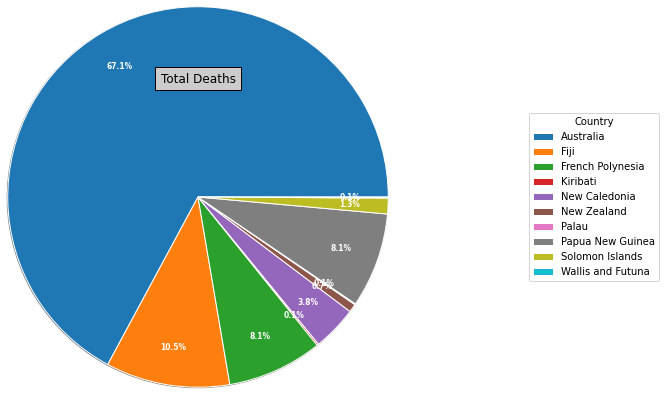

In [17]:
x = df["Total Deaths"]
y = df["Country"]
labels=df["Total Deaths"]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))
fig, ax = plt.subplots()
explode = (0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5 )
ax.pie(x, #colors=colors,
       radius=7, center=(4, 4), #explode=explode,
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, #frame= True
       autopct=("%1.1f%%"), textprops={'color':"w",'fontsize':7.5, "weight":"bold"}, pctdistance=0.8, shadow=True
      )
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
plt.title("Total Deaths",bbox={'facecolor':'0.8', 'pad':5})

ax.set(xlim=(0, 8), #xticks=np.arange(1, 8),
       ylim=(0, 8), #yticks=np.arange(1, 8)
      )

leyendas = df["Country"]
ax.legend(leyendas,
          title="Country",
          loc="center left",
          bbox_to_anchor=(2, 0, 1, 1))
plt.show()

> As we can see, the highest percentage of deaths its in Australia, with 67.1%, and Fiji with 10.5%.

  __2. Which country had the highest number of positive cases of COVID?__

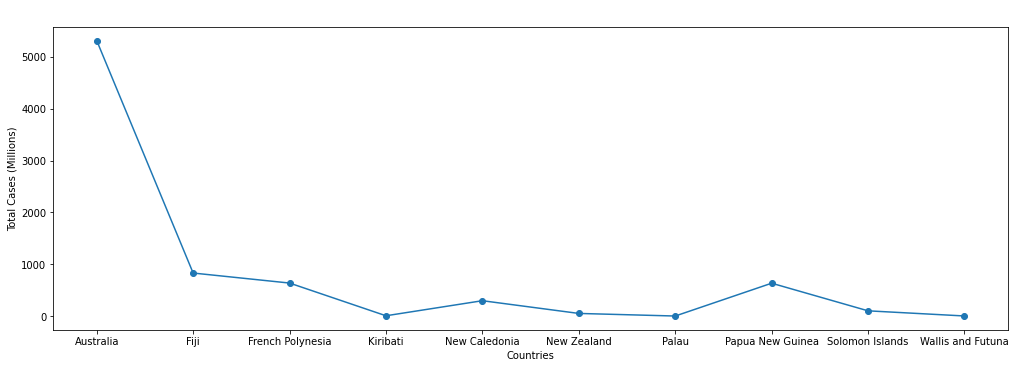

In [18]:
fig, ax = plt.subplots(figsize=(14, 5), layout='constrained')

plt.scatter(y, x)
plt.plot(y, x, )
plt.xlabel("Countries")
plt.ylabel("Total Cases (Millions)")
plt.title("Total Cases (Millions)", 
          fontdict={'family': 'serif', 
                    'color' : 'white',
                    'weight': 'bold',
                    'size': 18})
plt.show()

> We can conclude, analyzing the graphic, that Australia again wins the first place on the total number of cases.

  __3. Which country had the highest number of positive cases of COVID vs Population?__

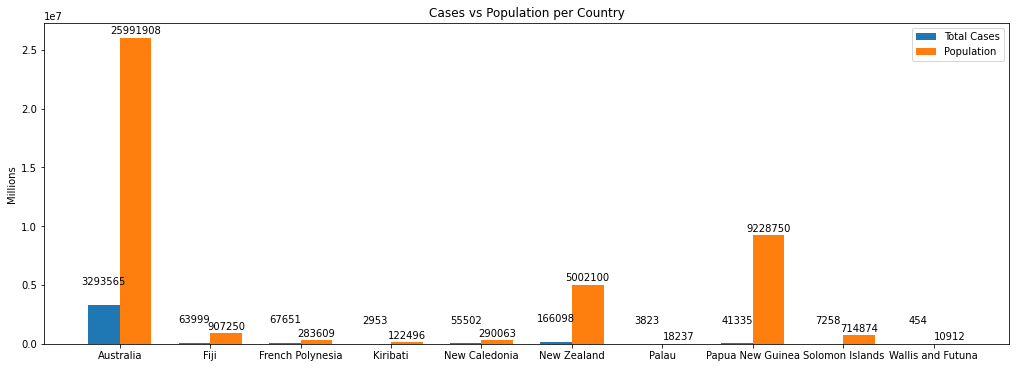

In [19]:
x = np.arange(len(df["Country"]))

# the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(14, 5), layout='constrained')
#fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df["Total Cases"], width, label='Total Cases'
               )
rects2 = ax.bar(x + width/2, df["Population"], width, label='Population'
               )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Millions')
ax.set_title('Cases vs Population per Country')
ax.set_xticks(x, df["Country"])
ax.legend()

ax.bar_label(rects1,fmt='%.2d', padding=18)
ax.bar_label(rects2,fmt='%.2d', padding=2)

#fig.tight_layout()

plt.show()

> We can conclude, analyzing the bar graph, that Palau has the highest percentage of positive cases vs the population.

4. In which country did more people recover from covid than died?

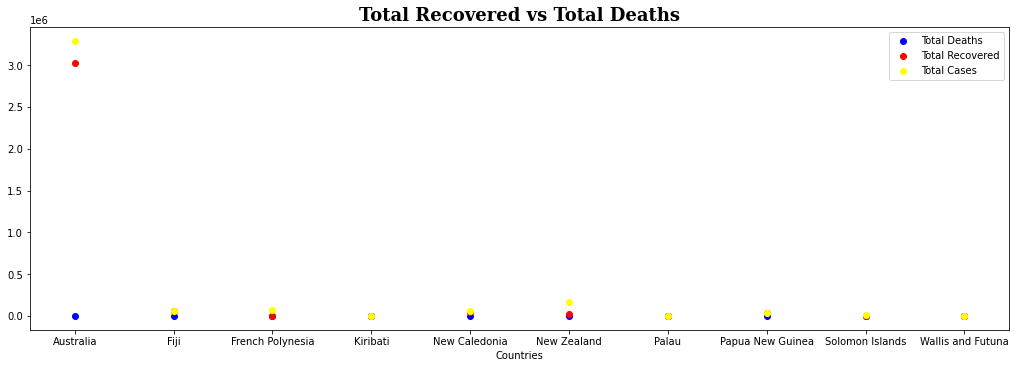

In [20]:
x = df["Total Recovered"]
y = df["Country"]
x1 = df["Total Deaths"]
y1 = df["Country"]
x2 = df["Total Cases"]
y2 = df["Country"]


fig, ax = plt.subplots(figsize=(14, 5), layout='constrained')
plt.scatter(y1, x1, color='blue')
plt.scatter(y, x, color='red')
plt.scatter(y2, x2, color='yellow')

plt.legend(["Total Deaths", "Total Recovered", "Total Cases"])

#plt.plot(y, x, color='red')
#plt.plot(y1, x1,color='blue' )
plt.xlabel("Countries")

plt.title("Total Recovered vs Total Deaths", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
plt.show()

> We can conclude, analyzing the scatter graph, that Australia has the highest number in recovered cases, maybe obviously because of the population. But in cases like New Zealand or Fiji, we have a very similar position between Recovered and Deaths.

5. Which country has the highest percentage of deaths with the Total Cases?

In [21]:
x = df["Total Cases"]
y = df["Total Deaths"]

g = ((y*100)/x)
myList = list(np.around(np.array(g),2))
myList2 = list(map("{}%".format, myList))
resultantList=[]
for element in myList2:
    if element not in resultantList:
        resultantList.append(element)
myList2.sort()




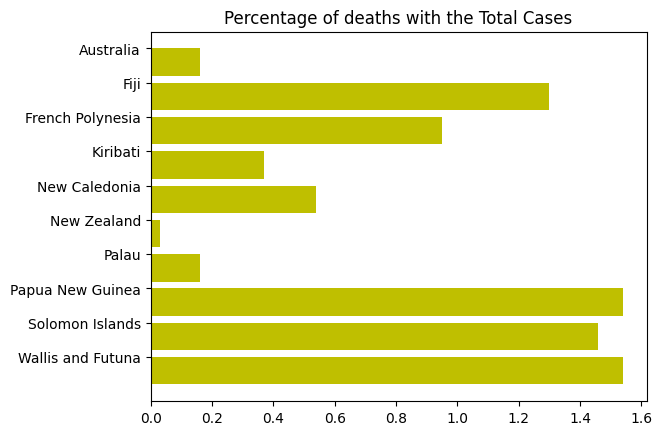

In [22]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
#people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(myList))
performance = 3 + 10 * np.random.rand(len(myList))
error = 0

ax.barh(y_pos, myList, xerr=error, align='edge', color="y")
ax.set_yticks(y_pos, labels=df["Country"])
#ax.set_xticks(y_pos, labels=myList2)
ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_xlabel('Performance')
ax.set_title('Percentage of deaths with the Total Cases')

plt.show()

> We can conclude, analyzing the bar plot, that Papua New Guinea and Wallis and Futuna have the highest percentage of deaths compared with the Total Cases.

6. Which country has more deaths every 1 million people?

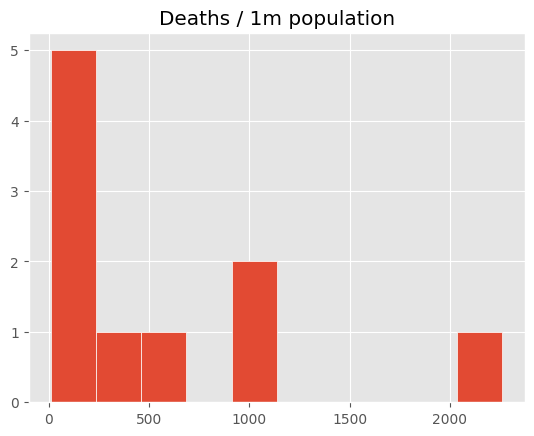

In [52]:
#fig, axs = plt.subplots(1, 2, tight_layout=True)

plt.hist(df["Deaths/ 1M pop"], bins=10, edgecolor="white", #labels=df["Country"]
        )
plt.style.use('ggplot')
plt.title('Deaths / 1m population')

plt.show()

> We can conclude, analyzing the bar plot, that Australia has the highest number of deaths every 1 million people, then  New Caledonia.

## Limitations/Problems

* I didn´t know how to do 3 plots in 1.
* I didn´t know how to separate the countries names to make it visible.
* I didn´t know how to make a scatter plot with a normal plot.